In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, ParameterGrid
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score

In [2]:
df = pd.read_csv("../data/Cornescu_Darius_new_features.csv")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Condition2,SalePrice,LotArea_m^2,Price_per_m^2,ZoningScore,SubClassScore,LotAreaNorm,PDI,Price_per_m^2_norm,EVI
0,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,...,Norm,145000,780.385200,185.805676,0.795605,0.105263,0.033186,0.359777,0.168856,0.344162
1,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,Inside,...,Norm,178000,728.080811,244.478356,0.795605,0.315789,0.030555,0.422145,0.226847,0.415263
2,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,...,Norm,85000,815.409631,104.242085,0.795605,0.157895,0.034948,0.376095,0.088239,0.314380
3,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,...,Norm,175000,668.901600,261.622935,0.795605,0.263158,0.027577,0.405462,0.243793,0.413210
4,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,Inside,...,Norm,127000,464.515000,273.403442,0.795605,0.263158,0.017294,0.402378,0.255437,0.419031


In [3]:
def make_preprocessor(dataframe):
    numeric_features = dataframe.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = dataframe.select_dtypes(include=['object']).columns.tolist()

    numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5))
    ])

    categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
    ])

    return preprocessor

In [4]:
def run_decision_tree_classification_pipeline(dataframe, number_bins, labels = None, random_state=42):
    
    target = "SalePrice"
    prices = dataframe[target].copy()

    if labels is None:
        labels = list(range(number_bins))

    Y = pd.qcut(prices, q=number_bins, labels=labels)
    X = dataframe.drop(columns=[target])

    preprocessor = make_preprocessor(X)
    classifier = DecisionTreeClassifier(random_state=random_state)

    Pipeline_steps = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state, stratify=Y)

    Pipeline_steps.fit(X_train, Y_train)
    Y_pred = Pipeline_steps.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred, average='weighted')
    report = classification_report(Y_test, Y_pred)
    cm = confusion_matrix(Y_test, Y_pred, labels = classifier.classes_)

    print("Accuracy: {:.3f}".format(accuracy))
    print("F1 Score: {:.3f}".format(f1))
    print("Classification Report:\n", report)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    disp.plot(cmap=plt.cm.Blues)

    return Pipeline_steps

In [5]:
def run_random_forest_classification_pipeline(dataframe, number_bins, labels = None, random_state=42):
    
    target = "SalePrice"
    prices = dataframe[target].copy()

    if labels is None:
        labels = list(range(number_bins))

    Y = pd.qcut(prices, q=number_bins, labels=labels)
    X = dataframe.drop(columns=[target])

    preprocessor = make_preprocessor(X)
    classifier = RandomForestClassifier(n_estimators=100,random_state=random_state, max_depth=10)

    Pipeline_steps = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state, stratify=Y)

    Pipeline_steps.fit(X_train, Y_train)
    Y_pred = Pipeline_steps.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred, average='weighted')
    report = classification_report(Y_test, Y_pred)
    cm = confusion_matrix(Y_test, Y_pred, labels = classifier.classes_)

    print("Accuracy: {:.3f}".format(accuracy))
    print("F1 Score: {:.3f}".format(f1))
    print("Classification Report:\n", report)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    disp.plot(cmap=plt.cm.Blues)

    return Pipeline_steps

Accuracy: 0.906
F1 Score: 0.906
Classification Report:
               precision    recall  f1-score   support

       cheap       0.93      0.95      0.94        79
   expensive       0.95      0.90      0.92        78
      medium       0.85      0.87      0.86        77

    accuracy                           0.91       234
   macro avg       0.91      0.91      0.91       234
weighted avg       0.91      0.91      0.91       234

Accuracy: 0.889
F1 Score: 0.889
Classification Report:
               precision    recall  f1-score   support

       cheap       0.91      0.92      0.92        79
   expensive       0.92      0.91      0.92        78
      medium       0.83      0.83      0.83        77

    accuracy                           0.89       234
   macro avg       0.89      0.89      0.89       234
weighted avg       0.89      0.89      0.89       234



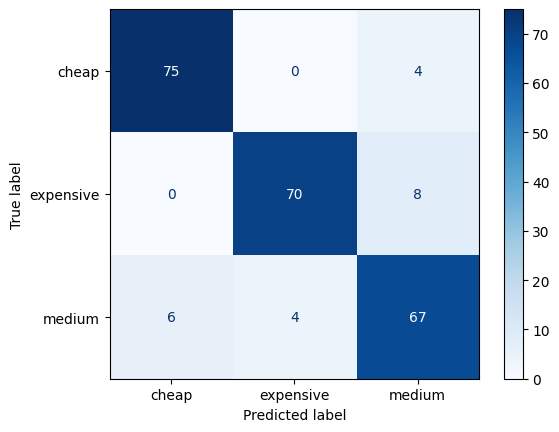

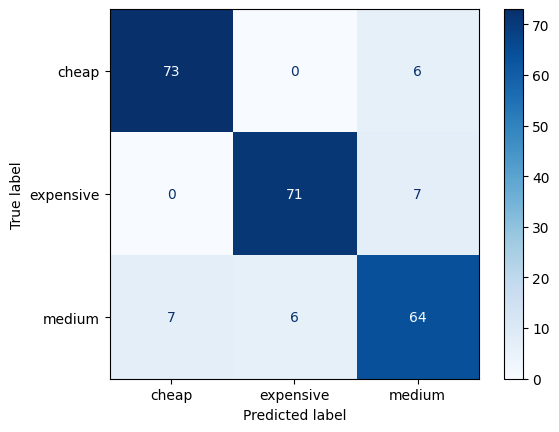

In [6]:
labels_3 = ["cheap", "medium", "expensive"]
res_3 = run_decision_tree_classification_pipeline(df, number_bins=3, labels=labels_3)
res_3_rf = run_random_forest_classification_pipeline(df, number_bins=3, labels=labels_3)

## Model Performance Comparison - 3 Price Categories

| **Metric** | **Decision Tree** | **Random Forest** | **Difference** |
|:-----------|:-----------------:|:-----------------:|:--------------:|
| **Overall Accuracy** | **90.6%** | 88.9% | +1.7% |
| **Overall F1-Score** | **90.6%** | 88.9% | +1.7% |
| **Macro Avg Precision** | **91%** | 89% | +2% |
| **Macro Avg Recall** | **91%** | 89% | +2% |

### Per-Class Performance

| **Class** | **Model** | **Precision** | **Recall** | **F1-Score** | **Support** |
|:----------|:----------|:-------------:|:----------:|:------------:|:-----------:|
| **Cheap** | Decision Tree | 93% | **95%** | **94%** | 79 |
|           | Random Forest | 91% | 92% | 92% |  |
| **Medium** | Decision Tree | **85%** | **87%** | **86%** | 77 |
|            | Random Forest | 83% | 83% | 83% |  |
| **Expensive** | Decision Tree | **95%** | 90% | **92%** | 78 |
|               | Random Forest | 92% | **91%** | 92% |  |


Accuracy: 0.5769
F1 Score: 0.5753
Precision: 0.5965

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.70      0.76        20
           1       0.60      0.63      0.62        19
           2       0.50      0.65      0.57        20
           3       0.40      0.30      0.34        20
           4       0.45      0.47      0.46        19
           5       0.45      0.45      0.45        20
           6       0.40      0.53      0.45        19
           7       0.50      0.40      0.44        20
           8       0.82      0.47      0.60        19
           9       0.55      0.84      0.67        19
          10       0.86      0.60      0.71        20
          11       0.81      0.89      0.85        19

    accuracy                           0.58       234
   macro avg       0.60      0.58      0.58       234
weighted avg       0.60      0.58      0.58       234

Accuracy: 0.4957
F1 Score: 0.4940
Precision: 0.5013

Clas

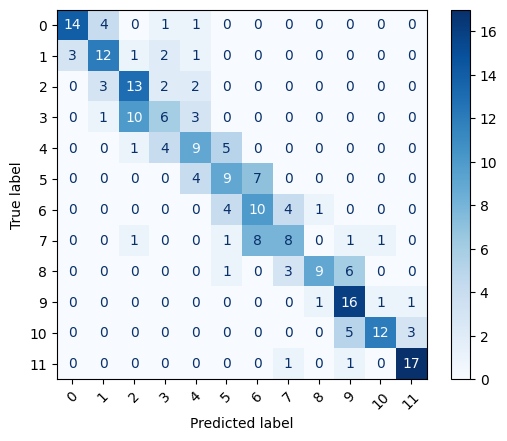

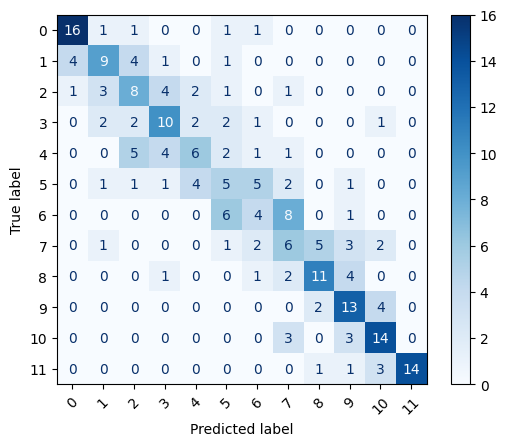

In [19]:
k_opt = 12
res_k = run_decision_tree_classification_pipeline(df, number_bins=k_opt)
res_k_rf = run_random_forest_classification_pipeline(df, number_bins=k_opt)

In [8]:
def analyze_price_distribution(dataframe, bin_width=None):
    prices = dataframe["SalePrice"]
    min_price = prices.min()
    max_price = prices.max()

    bins = np.arange(min_price, max_price + bin_width, bin_width)
    price_groups = pd.cut(prices, bins=bins)
    distribution = price_groups.value_counts().sort_index()

    print(f"Min Price: ${min_price:,.0f}")
    print(f"Max Price: ${max_price:,.0f}")
    print(f"\nDistribuție pe intervale de ${bin_width:,}:")
    with pd.option_context('display.max_rows', None):
        print(distribution)
    
    return distribution
    

In [9]:
print("\n" + "=" * 80)
print("ANALIZĂ CU INTERVALE DE $100,000")
print("=" * 80)
dist_100k = analyze_price_distribution(df, bin_width=100000)


ANALIZĂ CU INTERVALE DE $100,000
Min Price: $34,900
Max Price: $745,000

Distribuție pe intervale de $100,000:
SalePrice
(34900, 134900]     325
(134900, 234900]    624
(234900, 334900]    162
(334900, 434900]     44
(434900, 534900]      7
(534900, 634900]      4
(634900, 734900]      0
(734900, 834900]      1
Name: count, dtype: int64


In [10]:
print("\n" + "=" * 80)
print("ANALIZĂ CU INTERVALE DE $50,000")
print("=" * 80)
dist_50k = analyze_price_distribution(df, bin_width=50000)


ANALIZĂ CU INTERVALE DE $50,000
Min Price: $34,900
Max Price: $745,000

Distribuție pe intervale de $50,000:
SalePrice
(34900, 84900]       40
(84900, 134900]     285
(134900, 184900]    407
(184900, 234900]    217
(234900, 284900]    112
(284900, 334900]     50
(334900, 384900]     27
(384900, 434900]     17
(434900, 484900]      5
(484900, 534900]      2
(534900, 584900]      3
(584900, 634900]      1
(634900, 684900]      0
(684900, 734900]      0
(734900, 784900]      1
Name: count, dtype: int64


In [11]:
print("\n" + "=" * 80)
print("ANALIZĂ CU INTERVALE DE $20,000")
print("=" * 80)
dist_20k = analyze_price_distribution(df, bin_width=20000)


ANALIZĂ CU INTERVALE DE $20,000
Min Price: $34,900
Max Price: $745,000

Distribuție pe intervale de $20,000:
SalePrice
(34900, 54900]        4
(54900, 74900]        9
(74900, 94900]       60
(94900, 114900]      89
(114900, 134900]    163
(134900, 154900]    178
(154900, 174900]    150
(174900, 194900]    145
(194900, 214900]     77
(214900, 234900]     74
(234900, 254900]     54
(254900, 274900]     42
(274900, 294900]     28
(294900, 314900]     15
(314900, 334900]     23
(334900, 354900]     14
(354900, 374900]      6
(374900, 394900]     14
(394900, 414900]      5
(414900, 434900]      5
(434900, 454900]      3
(454900, 474900]      1
(474900, 494900]      2
(494900, 514900]      1
(514900, 534900]      0
(534900, 554900]      1
(554900, 574900]      1
(574900, 594900]      1
(594900, 614900]      0
(614900, 634900]      1
(634900, 654900]      0
(654900, 674900]      0
(674900, 694900]      0
(694900, 714900]      0
(714900, 734900]      0
(734900, 754900]      1
Name: count, dty

In [12]:
print("\n" + "=" * 80)
print("ANALIZĂ CU INTERVALE DE $10,000")
print("=" * 80)
dist_10k = analyze_price_distribution(df, bin_width=10000)


ANALIZĂ CU INTERVALE DE $10,000
Min Price: $34,900
Max Price: $745,000

Distribuție pe intervale de $10,000:
SalePrice
(34900, 44900]        2
(44900, 54900]        2
(54900, 64900]        7
(64900, 74900]        2
(74900, 84900]       27
(84900, 94900]       33
(94900, 104900]      30
(104900, 114900]     59
(114900, 124900]     68
(124900, 134900]     95
(134900, 144900]    103
(144900, 154900]     75
(154900, 164900]     77
(164900, 174900]     73
(174900, 184900]     79
(184900, 194900]     66
(194900, 204900]     39
(204900, 214900]     38
(214900, 224900]     37
(224900, 234900]     37
(234900, 244900]     34
(244900, 254900]     20
(254900, 264900]     21
(264900, 274900]     21
(274900, 284900]     16
(284900, 294900]     12
(294900, 304900]      7
(304900, 314900]      8
(314900, 324900]     14
(324900, 334900]      9
(334900, 344900]      9
(344900, 354900]      5
(354900, 364900]      2
(364900, 374900]      4
(374900, 384900]      7
(384900, 394900]      7
(394900, 404900]

In [13]:
print("=" * 80)
print("ANALIZĂ CU INTERVALE DE $5,000")
print("=" * 80)
dist_5k = analyze_price_distribution(df, bin_width=5000)

ANALIZĂ CU INTERVALE DE $5,000
Min Price: $34,900
Max Price: $745,000

Distribuție pe intervale de $5,000:
SalePrice
(34900, 39900]       2
(39900, 44900]       0
(44900, 49900]       0
(49900, 54900]       2
(54900, 59900]       3
(59900, 64900]       4
(64900, 69900]       0
(69900, 74900]       2
(74900, 79900]       8
(79900, 84900]      19
(84900, 89900]      18
(89900, 94900]      15
(94900, 99900]      14
(99900, 104900]     16
(104900, 109900]    29
(109900, 114900]    30
(114900, 119900]    37
(119900, 124900]    31
(124900, 129900]    53
(129900, 134900]    42
(134900, 139900]    52
(139900, 144900]    51
(144900, 149900]    47
(149900, 154900]    28
(154900, 159900]    40
(159900, 164900]    37
(164900, 169900]    36
(169900, 174900]    37
(174900, 179900]    49
(179900, 184900]    30
(184900, 189900]    33
(189900, 194900]    33
(194900, 199900]    16
(199900, 204900]    23
(204900, 209900]    18
(209900, 214900]    20
(214900, 219900]    18
(219900, 224900]    19
(224900, 

In [14]:
def analyze_qcut_distribution(dataframe, n_bins):
    prices = dataframe['SalePrice']
    price_categories = pd.qcut(prices, q=n_bins, duplicates='drop')

    distribution = price_categories.value_counts().sort_index()
    print(f"\nDistribuție:")
    with pd.option_context('display.max_rows', None):
        print(distribution)
    
    return price_categories, distribution


cats, dist = analyze_qcut_distribution(df, 10)



Distribuție:
SalePrice
(34899.999, 107000.0]    118
(107000.0, 125000.0]     123
(125000.0, 137000.0]     111
(137000.0, 149000.0]     116
(149000.0, 165000.0]     120
(165000.0, 179900.0]     115
(179900.0, 200000.0]     120
(200000.0, 230000.0]     115
(230000.0, 275950.0]     113
(275950.0, 745000.0]     117
Name: count, dtype: int64


In [15]:
def create_smart_bins(dataframe):
    """
        very_cheap --- 34.9K - 90K  
        cheap --- 90K - 120K
        affordable --- 120K - 140K 
        medium_low --- 140K - 160K 
        medium --- 160K - 180K 
        medium_high --- 180K - 200K 
        expensive --- 200K - 235K
        very_expensive --- 235K - 285K 
        luxury --- 285K - 400K 
        ultra_luxury --- 400K+ 

    """
    prices = dataframe['SalePrice']
    custom_bins = [
        34900,  
        90000,      
        120000,     
        140000,     
        160000,    
        180000,     
        200000,     
        235000,     
        285000,     
        400000,     
        745001     
    ]

    labels = ['very_cheap', 'cheap', 'affordable', 'medium_low', 'medium', 'medium_high', 'expensive', 'very_expensive', 'luxury', 'ultra_luxury']

    price_groups = pd.cut(prices, bins=custom_bins, labels=labels, include_lowest=True)
    distribution = price_groups.value_counts().sort_index()
    

    print("\nIntervale și count-uri:")
    for i, (label, count) in enumerate(zip(labels, distribution)):
        print(f"{label:20s} [{custom_bins[i]:>8,.0f} - {custom_bins[i+1]:>8,.0f}]: {count:4d} case")
    
    return custom_bins, labels

custom_bins, custom_labels = create_smart_bins(df)


Intervale și count-uri:
very_cheap           [  34,900 -   90,000]:   62 case
cheap                [  90,000 -  120,000]:  144 case
affordable           [ 120,000 -  140,000]:  188 case
medium_low           [ 140,000 -  160,000]:  161 case
medium               [ 160,000 -  180,000]:  156 case
medium_high          [ 180,000 -  200,000]:  112 case
expensive            [ 200,000 -  235,000]:  134 case
very_expensive       [ 235,000 -  285,000]:  107 case
luxury               [ 285,000 -  400,000]:   83 case
ultra_luxury         [ 400,000 -  745,001]:   21 case


Accuracy: 0.6880
F1 Score: 0.6876
Precision: 0.6964

Classification Report:
                precision    recall  f1-score   support

    affordable       0.70      0.79      0.74        38
         cheap       0.77      0.79      0.78        29
     expensive       0.76      0.59      0.67        27
        luxury       0.69      0.65      0.67        17
        medium       0.66      0.68      0.67        31
   medium_high       0.72      0.57      0.63        23
    medium_low       0.61      0.59      0.60        32
  ultra_luxury       0.75      0.75      0.75         4
    very_cheap       0.90      0.75      0.82        12
very_expensive       0.55      0.76      0.64        21

      accuracy                           0.69       234
     macro avg       0.71      0.69      0.70       234
  weighted avg       0.70      0.69      0.69       234



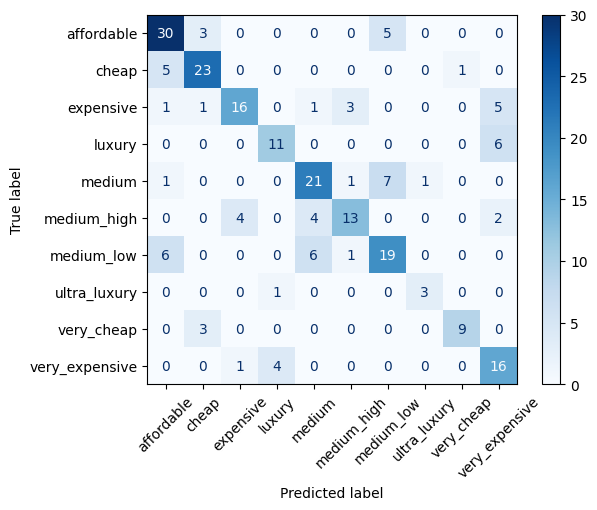

In [16]:
def run_decision_tree_classification_pipeline(dataframe, number_bins=None, labels=None, custom_bins=None, random_state=42):
    
    target = "SalePrice"
    prices = dataframe[target].copy()

    if custom_bins is not None:
        Y = pd.cut(prices, bins=custom_bins, labels=labels, include_lowest=True)
    elif number_bins is not None:
        if labels is None:
            labels = list(range(number_bins))
        Y = pd.qcut(prices, q=number_bins, labels=labels, duplicates='drop')

    X = dataframe.drop(columns=[target])
    preprocessor = make_preprocessor(X)
    classifier = DecisionTreeClassifier(random_state=random_state)

    Pipeline_steps = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state, stratify=Y)

    Pipeline_steps.fit(X_train, Y_train)
    Y_pred = Pipeline_steps.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred, average='weighted')
    f1 = f1_score(Y_test, Y_pred, average='weighted')
    report = classification_report(Y_test, Y_pred)
    cm = confusion_matrix(Y_test, Y_pred, labels=classifier.classes_)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"\nClassification Report:\n{report}")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)

    return Pipeline_steps


res_custom = run_decision_tree_classification_pipeline(df, custom_bins=custom_bins, labels=custom_labels)

Accuracy: 0.5342
F1 Score: 0.5186
Precision: 0.5398

Classification Report:
                precision    recall  f1-score   support

    affordable       0.58      0.68      0.63        38
         cheap       0.54      0.72      0.62        29
     expensive       0.50      0.56      0.53        27
        luxury       0.63      0.71      0.67        17
        medium       0.47      0.61      0.54        31
   medium_high       0.45      0.22      0.29        23
    medium_low       0.54      0.41      0.46        32
  ultra_luxury       1.00      0.50      0.67         4
    very_cheap       0.67      0.17      0.27        12
very_expensive       0.48      0.48      0.48        21

      accuracy                           0.53       234
     macro avg       0.59      0.50      0.51       234
  weighted avg       0.54      0.53      0.52       234



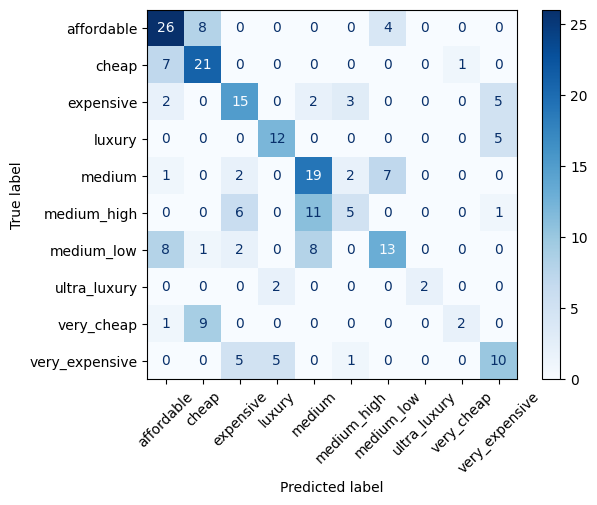

In [17]:
def run_random_forest_classification_pipeline(dataframe, number_bins=None, labels=None, custom_bins=None, random_state=42):
    
    target = "SalePrice"
    prices = dataframe[target].copy()

    if custom_bins is not None:
        Y = pd.cut(prices, bins=custom_bins, labels=labels, include_lowest=True)
    elif number_bins is not None:
        if labels is None:
            labels = list(range(number_bins))
        Y = pd.qcut(prices, q=number_bins, labels=labels, duplicates='drop')

    X = dataframe.drop(columns=[target])
    preprocessor = make_preprocessor(X)
    classifier = RandomForestClassifier(n_estimators=100,random_state=random_state, max_depth=10)

    Pipeline_steps = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state, stratify=Y)

    Pipeline_steps.fit(X_train, Y_train)
    Y_pred = Pipeline_steps.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred, average='weighted')
    f1 = f1_score(Y_test, Y_pred, average='weighted')
    report = classification_report(Y_test, Y_pred)
    cm = confusion_matrix(Y_test, Y_pred, labels=classifier.classes_)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"\nClassification Report:\n{report}")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)

    return Pipeline_steps


res_custom = run_random_forest_classification_pipeline(df, custom_bins=custom_bins, labels=custom_labels)

Performanța a crescut de la 0,52 la 0,64, o îmbunătățire semnificativă, dar unele intervale rămân problematice. Limitele sunt foarte sensibile: de exemplu, pentru medium_low, ajustarea capetelor ca să reduc confuzia cu medium și affordable îmbunătățește local rezultatele, dar strică alte clase. Cea mai bună modificare a fost la very_cheap: mutarea limitei superioare de la 80k la 90k a ridicat scorul de la 0,64 la 0,688.


Am testat multiple ajustări ale valorilor, dar nu am găsit o configurație care să îmbunătățească acuratețea.

GRIDSEARCH CROSS VALIDATION

In [18]:
def random_forest_gridsearch_cv(dataframe, number_bins=None, labels=None, custom_bins=None, n_splits=5, n_jobs=-1, verbose=1):

    target = "SalePrice"
    prices = dataframe[target].copy()


    if custom_bins is not None:
        Y = pd.cut(prices, bins=custom_bins, labels=labels, include_lowest=True)
    elif number_bins is not None:
        if labels is None:
            labels = list(range(number_bins))
        Y = pd.qcut(prices, q=number_bins, labels=labels, duplicates='drop')
    

    X = dataframe.drop(columns=[target])
    preprocessor = make_preprocessor(X)
    base_clf = RandomForestClassifier(random_state=42)

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', base_clf)
    ])

    X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42, stratify=Y )


    grid_list = [
        # cazul bootstrap=True => putem căuta max_samples
        {
            'classifier__n_estimators': [100, 200, 300],
            'classifier__max_depth': [10, 15, 20, None],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 4],
            'classifier__max_features': ['sqrt', 'log2'],
            'classifier__criterion': ['gini', 'entropy'],
            'classifier__bootstrap': [True],
            'classifier__max_samples': [0.7, 0.8, 1.0],
        },
        # cazul bootstrap=False => max_samples trebuie să fie None
        {
            'classifier__n_estimators': [100, 200, 300],
            'classifier__max_depth': [10, 15, 20, None],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 4],
            'classifier__max_features': ['sqrt', 'log2'],
            'classifier__criterion': ['gini', 'entropy'],
            'classifier__bootstrap': [False],
            'classifier__max_samples': [None],
        }
    ]

    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    scoring = {
        'accuracy': 'accuracy',
        'f1_weighted': 'f1_weighted',
        'precision_weighted': 'precision_weighted'
    }

    grid = GridSearchCV( 
        estimator=pipeline,
        param_grid=grid_list,
        scoring=scoring,
        refit='f1_weighted',
        cv=cv,
        n_jobs=n_jobs,
        verbose=verbose,
        return_train_score=False
    )

    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1w = f1_score(y_test, y_pred, average='weighted')
    precw = precision_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred)

    print("===== GridSearchCV (Random Forest) =====")
    print(f"Best params: {grid.best_params_}")
    print(f"CV best (f1_weighted): {grid.best_score_:.4f}")
    print("\n----- Test set -----")
    print(f"Accuracy:  {acc:.4f}")
    print(f"F1 (w):    {f1w:.4f}")
    print(f"Precision (w): {precw:.4f}")
    print("\nClassification Report:\n", report)

    return {
        "best_estimator": best_model,
        "best_params": grid.best_params_,
        "best_cv_f1_weighted": grid.best_score_,
        "test_metrics": {
            "accuracy": acc, "f1_weighted": f1w, "precision_weighted": precw
        }
    }


results = random_forest_gridsearch_cv(df, custom_bins=custom_bins, labels=custom_labels)



Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
===== GridSearchCV (Random Forest) =====
Best params: {'classifier__bootstrap': False, 'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__max_samples': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
CV best (f1_weighted): 0.5663

----- Test set -----
Accuracy:  0.5128
F1 (w):    0.5034
Precision (w): 0.5135

Classification Report:
                 precision    recall  f1-score   support

    affordable       0.51      0.68      0.58        38
         cheap       0.58      0.66      0.61        29
     expensive       0.54      0.56      0.55        27
        luxury       0.63      0.71      0.67        17
        medium       0.47      0.52      0.49        31
   medium_high       0.35      0.30      0.33        23
    medium_low       0.45      0.31      0.37        32
  ultra_luxury       1.0